In [15]:
import tensorflow as tf

In [16]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.optimizers import Adam
from keras.models import Sequential

In [18]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0

In [20]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [21]:
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
tf_callbacks=tf.keras.callbacks.TensorBoard(log_dir='logs/fit',histogram_freq=1)

In [23]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,callbacks=tf_callbacks)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.6399 - accuracy: 0.8346 - val_loss: 0.3458 - val_accuracy: 0.9072
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3408 - accuracy: 0.9045 - val_loss: 0.2756 - val_accuracy: 0.9245
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2879 - accuracy: 0.9189 - val_loss: 0.2407 - val_accuracy: 0.9334
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2553 - accuracy: 0.9279 - val_loss: 0.2164 - val_accuracy: 0.9403
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2282 - accuracy: 0.9360 - val_loss: 0.1984 - val_accuracy: 0.9435
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2076 - accuracy: 0.9420 - val_loss: 0.1818 - val_accuracy: 0.9496
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1915 - accuracy: 0.9473 - val_loss: 0.1676 - val_ac

In [24]:
%load_ext tensorboard

In [26]:
tensorboard --logdir logs/fit

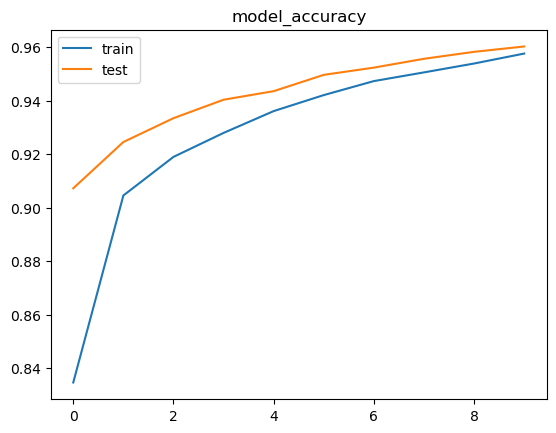

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

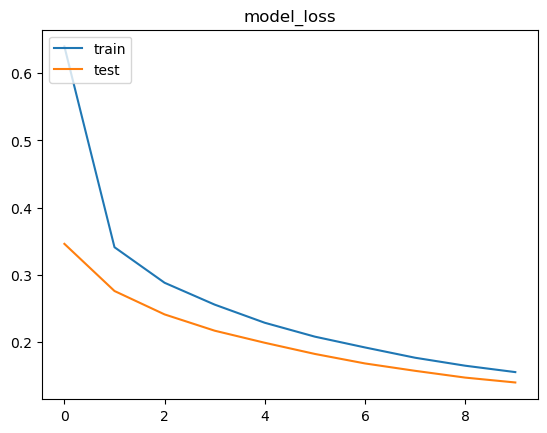

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.legend(['train','test'],loc='upper left')
plt.show()